Number of Meteorites = 1, Probability = 0.218
Number of Meteorites = 2, Probability = 0.241
Number of Meteorites = 3, Probability = 0.191
Number of Meteorites = 4, Probability = 0.122
Number of Meteorites = 5, Probability = 0.066
Number of Meteorites = 6, Probability = 0.032
Number of Meteorites = 7, Probability = 0.014
Number of Meteorites = 8, Probability = 0.006
Number of Meteorites = 9, Probability = 0.002


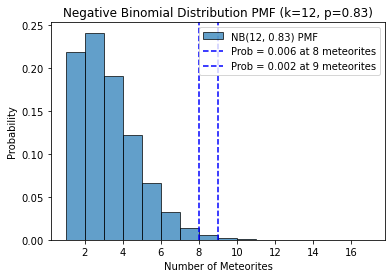

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 12  # number of successes
p = 0.83  # probability of success
m_trials = 16 # Number of trials for the plot

# Desired cumulative probability threshold
pmf_threshold = 0.005

# Initialize variables
m = 1
last_m_more_half = 0 
first_m_less_half = 0 

# find where the probability is less than 0.5%
while True: 
    probability = nbinom.pmf(m, k, p)
    print(f"Number of Meteorites = {m}, Probability = {probability:.3f}")
    if probability < pmf_threshold:
        first_m_less_half = m
        break
    else:
        last_m_more_half = m
        m += 1
        continue

        
        
# Plotting the PMF using a bar plot

# Values for x-axis (number of meteorites)
x = np.arange(1, m_trials+1)
# Probability mass function (PMF) for negative binomial distribution
pmf = nbinom.pmf(x, k, p)
# Plotting using a bar plot
plt.hist(x, weights=pmf, bins=np.arange(1, m_trials+2), edgecolor='black', alpha=0.7, label=f'NB({k}, {p}) PMF')

# Highlight the probability less than 0.5%
plt.axvline(last_m_more_half, color='b', linestyle='--',
            label=f'Prob = {nbinom.pmf(last_m_more_half,k,p):.3f} at {last_m_more_half} meteorites')
plt.axvline(first_m_less_half, color='b', linestyle='--',
            label=f'Prob = {nbinom.pmf(first_m_less_half,k,p):.3f} at {first_m_less_half} meteorites')

# Set labels and title
plt.xlabel('Number of Meteorites')
plt.ylabel('Probability')
plt.title(f'Negative Binomial Distribution PMF (k={k}, p={p})')

# Display the legend
plt.legend()

# Show the plot
plt.show()

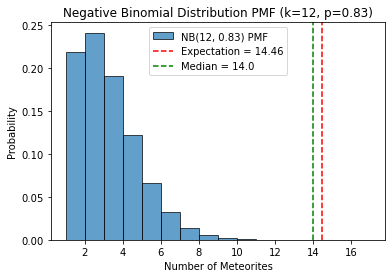

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters
k = 12  # number of successes
p = 0.83  # probability of success
m_trials = 16 # Number of trials for the plot    
        
# Plotting the PMF using a bar plot

# Values for x-axis (number of meteorites)
x = np.arange(1, m_trials+1)
# Probability mass function (PMF) for negative binomial distribution
pmf = nbinom.pmf(x, k, p)
# Plotting using a bar plot
plt.hist(x, weights=pmf, bins=np.arange(1, m_trials+2), edgecolor='black', alpha=0.7, label=f'NB({k}, {p}) PMF')

# Getting values & Highlight the expectation and median
expectation = k / p
median = np.ceil((k - 1) / p)
plt.axvline(expectation,
            color='r',
            linestyle='--',
            label=f'Expectation = {expectation:.2f}')
plt.axvline(median,
            color='g',
            linestyle='--',
            label=f'Median = {median}')

# Set labels and title
plt.xlabel('Number of Meteorites')
plt.ylabel('Probability')
plt.title(f'Negative Binomial Distribution PMF (k={k}, p={p})')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [19]:
from scipy.optimize import minimize
import numpy as np

# Define the log-likelihood function
def log_likelihood(theta, samples):
    return -np.sum(np.log((1/(24*theta**5)) * samples**4 * np.exp(-samples/theta)))

# Given samples
samples = np.array([19, 106, 11, 30, 40])

# Initial guess for the solution
initial_guess = 50

# Minimize the negative log-likelihood (equivalent to maximizing the log-likelihood)
result = minimize(log_likelihood, initial_guess, args=(samples,), method='BFGS')

# Extract the optimal value of theta
theta_mle = result.x[0]

print(f"Maximum Likelihood Estimate (MLE) for theta: {theta_mle:.4f}")


Maximum Likelihood Estimate (MLE) for theta: -377.6221


C:\Users\azabaly\AppData\Local\Temp\ipykernel_6480\242279767.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log((1/(24*theta**5)) * samples**4 * np.exp(-samples/theta)))
C:\Users\azabaly\AppData\Local\Temp\ipykernel_6480\242279767.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log((1/(24*theta**5)) * samples**4 * np.exp(-samples/theta)))
C:\Users\azabaly\AppData\Local\Temp\ipykernel_6480\242279767.py:6: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log((1/(24*theta**5)) * samples**4 * np.exp(-samples/theta)))


In [21]:
from scipy.integrate import quad
import numpy as np

# Define the integrand
def integrand(s, theta):
    return (s**5)/(24*theta**5) * np.exp(-s/theta)

# Given value of theta
theta = -377.62

# Integrate over the range [0, ∞)
result, error = quad(integrand, 0, np.inf, args=(theta,))

print(f"Integral result: {result}, Error: {error}")


Integral result: -1.9048796720296082, Error: 738.0854105563859


C:\Users\azabaly\AppData\Local\Temp\ipykernel_6480\3700705188.py:6: RuntimeWarning: overflow encountered in exp
  return (s**5)/(24*theta**5) * np.exp(-s/theta)
C:\Users\azabaly\AppData\Local\Temp\ipykernel_6480\3700705188.py:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, error = quad(integrand, 0, np.inf, args=(theta,))


In [1]:
from scipy.stats import t

# Degrees of freedom
df = 9

# Significance level
alpha = 0.05

# Critical t-value
critical_t = t.ppf(alpha, df)

print(f"Critical t-value: {critical_t}")

Critical t-value: -1.8331129326536337


Probability of waiting between 2 and 4 hours: 5.999e-11 with integral error  2.326e-13


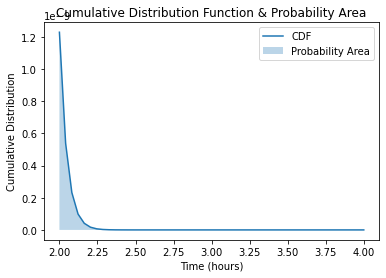

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

# Define the cumulative distribution function (CDF)
def cdf(y):
    return (59/99) * np.exp(-5 * y**2) + (40/99) * np.exp(-8 * y**8)

# Calculate the cumulative probability from 2 to 4 hours
probability_2_to_4, prob_erro = quad(cdf, 2, 4)
print(f"Probability of waiting between 2 and 4 hours: {probability_2_to_4:.3e} with integral error {prob_erro: .3e}")

# Generate values for y
y_values = np.linspace(2, 4)
# Calculate CDF values
cdf_values = cdf(y_values)
# Plot the cdf graph
plt.plot(y_values, cdf_values, label='CDF')
plt.fill_between(y_values, cdf_values, where=[(2 <= y <= 4) for y in y_values], alpha=0.3, label='Probability Area')
plt.xlabel('Time (hours)')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution Function & Probability Area')
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

# Define the cumulative distribution function (CDF)
def cdf(y):
    return (59/99) * np.exp(-5 * y**2) + (40/99) * np.exp(-8 * y**8)

# Define the probability density function (PDF) using the derivative of the CDF
def pdf(y):
    return ((59/99) * (2 * 5 * y) * np.exp(-5 * y**2)) + ((40/99) * (8 * 8 * y**7) * np.exp(-8 * y**8))

# Discretize time into minutes
minutes = np.arange(0, 4*60 + 1)  # 4 hours in minutes

# Calculate PDF & CDF values for each minute
pdf_values_minute = pdf(minutes / 60)  # Convert minutes to hours
cdf_values_minute = cdf(minutes / 60)

# Calculate mean
mean, error_mean = quad(lambda y: y * pdf(y), 0, np.inf)

# Calculate variance
variance, error_var = quad(lambda y: (y - mean)**2 * pdf(y), 0, np.inf)

# Display the results
print(f"Mean: {mean:.4f} hours with integral error {error_mean:.3e}")
print(f"Variance: {variance:.4f} hours^2 with integral error {error_var:.3e}")

# Find the quartiles
quartiles = [0.25, 0.5, 0.75]
quartile_values = [fsolve(lambda y, q: cdf(y) - q, x0=q , args=(q,))[0] for q in quartiles]

# Print the mean, variance, and quartiles
print(f"Lower Quartile: {quartile_values[0]:.4f} hours")
print(f"Median: {quartile_values[1]:.4f} hours")
print(f"Upper Quartile: {quartile_values[2]:.4f} hours")

Mean: 0.5296 hours with integral error 9.760e-09
Variance: 0.0565 hours^2 with integral error 1.108e-08
Lower Quartile: 0.7319 hours
Median: 0.5584 hours
Upper Quartile: 0.3294 hours


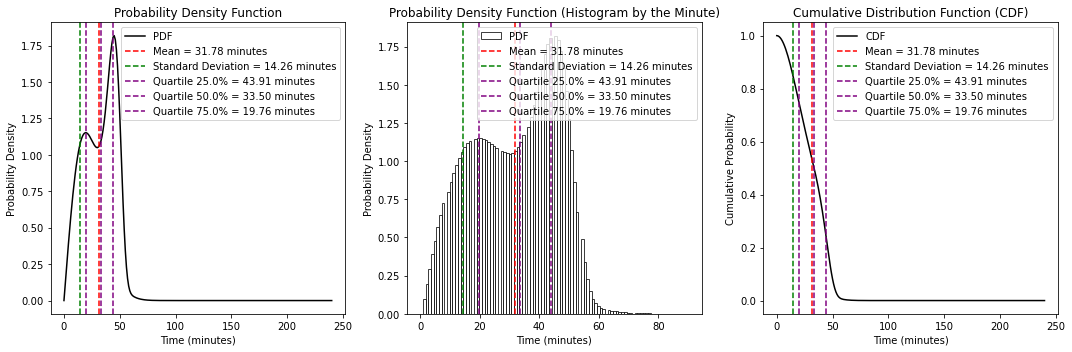

In [34]:
# Plotting
plt.figure(figsize=(15, 5))
# PDF
plt.subplot(1, 3, 1)
plt.plot(minutes, pdf_values_minute, label='PDF', color='black')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
 
# Histogram
plt.subplot(1, 3, 2)
plt.hist(minutes, bins=100, range=(0, 90), weights=pdf_values_minute, alpha=0.75, label='PDF', color='white', edgecolor='black')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (Histogram by the Minute)')
 
# CDF
plt.subplot(1, 3, 3)
plt.plot(minutes, cdf_values_minute, label='CDF', color='black')
plt.xlabel('Time (minutes)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
 
# Highlight the parameters
plot_index = [1,2,3]
for n in plot_index:
    plt.subplot(1, 3, n)
    plt.axvline(mean * 60,
            color='red', linestyle='--',
            label=f'Mean = {mean * 60:.2f} minutes')
    plt.axvline(np.sqrt(variance) * 60,
            color='green', linestyle='--',
            label=f'Standard Deviation = {np.sqrt(variance) * 60:.2f} minutes')
    for quartile, value in zip(quartiles, quartile_values):
        plt.axvline(value * 60,
                color='purple', linestyle='--',
                label=f'Quartile {quartile * 100}% = {value * 60:.2f} minutes')
    plt.legend()
plt.tight_layout()
plt.show()

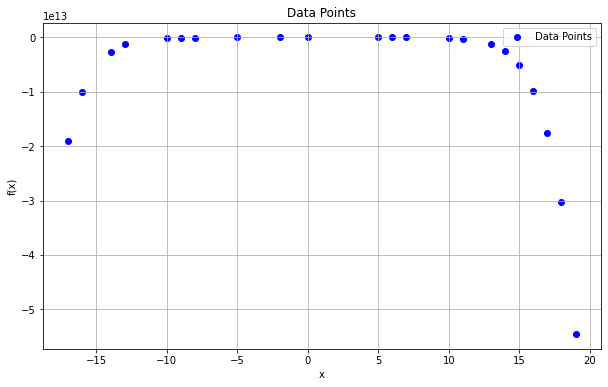

OLS Estimate:
Coefficients: ['6.56e+11', '1.88e+11', '-5.34e+10', '-4.77e+09', '7.24e+08', '3.03e+07', '-2.68e+06', '-5.48e+04', '-4.29e+02', '2.80e+01', '2.09e+02']


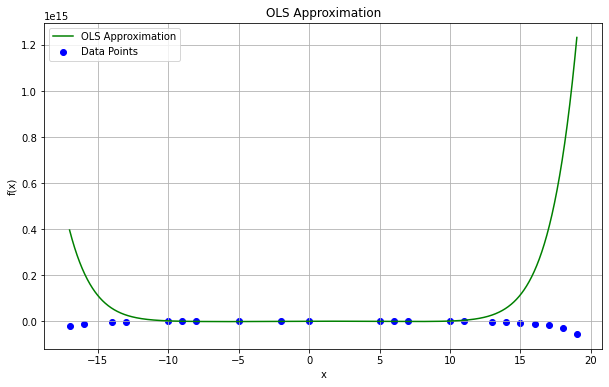

Ridge Estimate for lambda 1.00e+05:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.55e+11', '1.81e+13', '6.28e+12', '-5.33e+13', '4.73e+13']


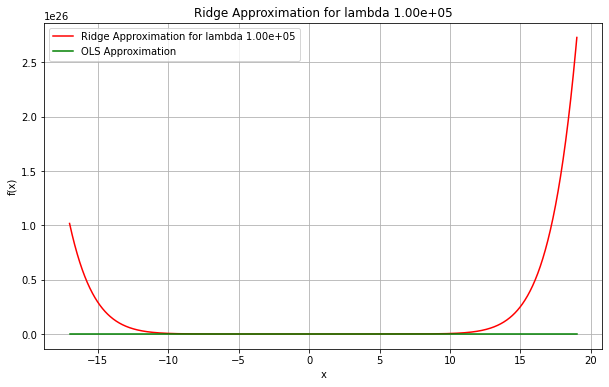

MSE for lambda 1.00e+05: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e+04:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.54e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


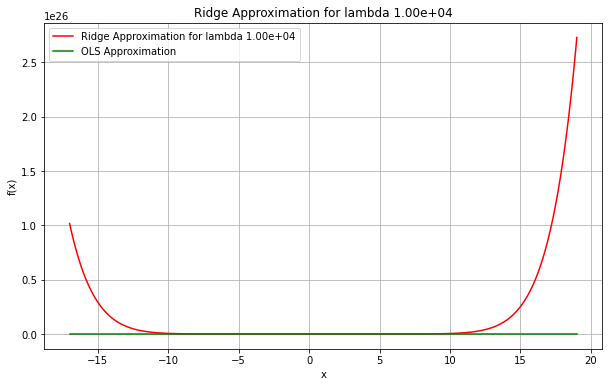

MSE for lambda 1.00e+04: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e+03:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


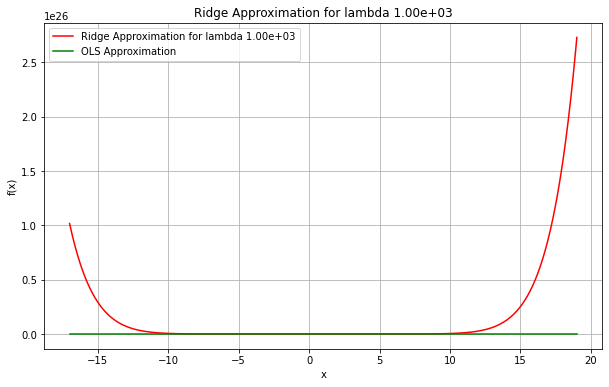

MSE for lambda 1.00e+03: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e+02:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


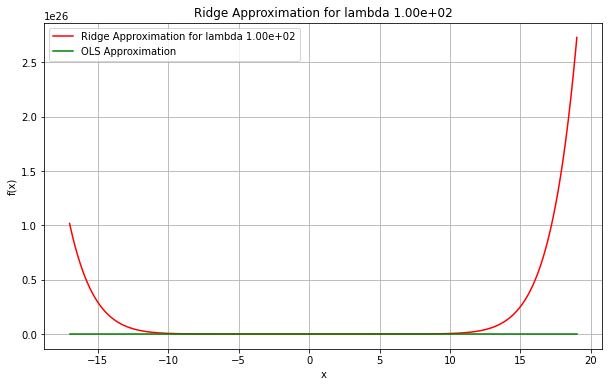

MSE for lambda 1.00e+02: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e+01:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


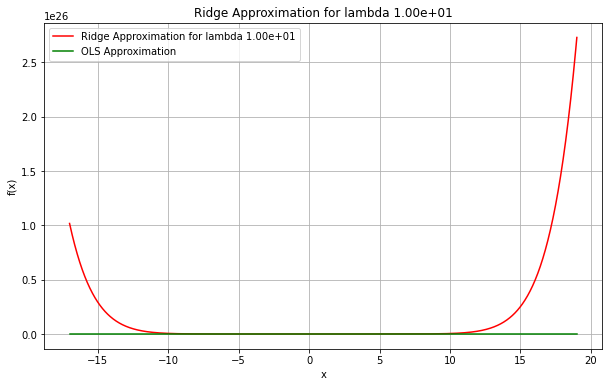

MSE for lambda 1.00e+01: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e+00:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


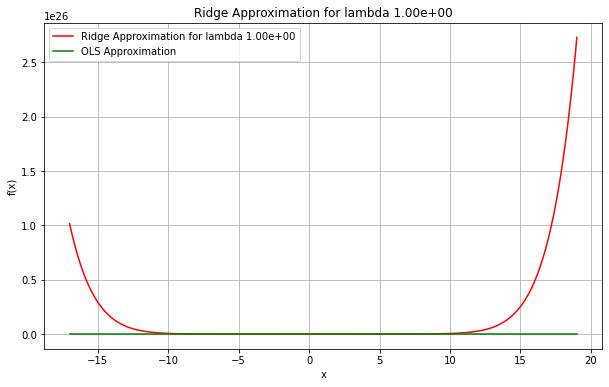

MSE for lambda 1.00e+00: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e-01:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


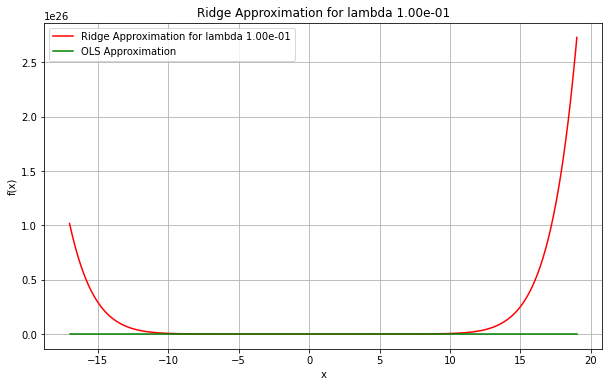

MSE for lambda 1.00e-01: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e-02:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


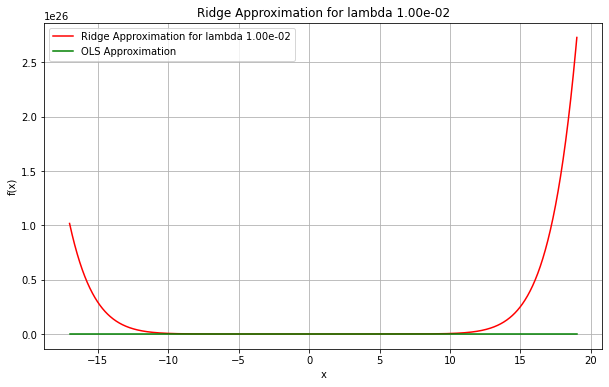

MSE for lambda 1.00e-02: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e-03:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


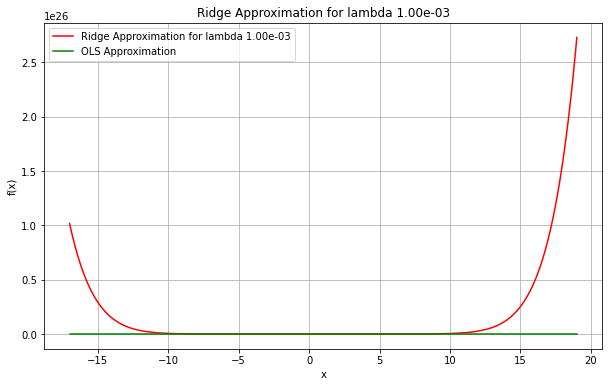

MSE for lambda 1.00e-03: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e-04:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


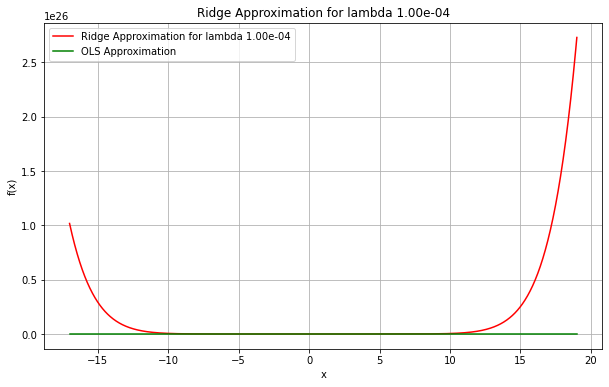

MSE for lambda 1.00e-04: 5.66e+51
*****************************************************************************************************************************
Ridge Estimate for lambda 1.00e-05:
Coefficients: ['-1.77e+13', '-1.18e+13', '6.19e+12', '1.84e+13', '-4.15e+12', '-1.70e+13', '2.53e+11', '1.81e+13', '6.29e+12', '-5.33e+13', '4.73e+13']


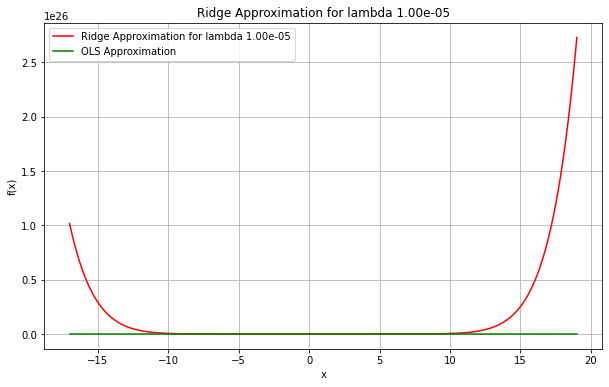

MSE for lambda 1.00e-05: 5.66e+51
*****************************************************************************************************************************


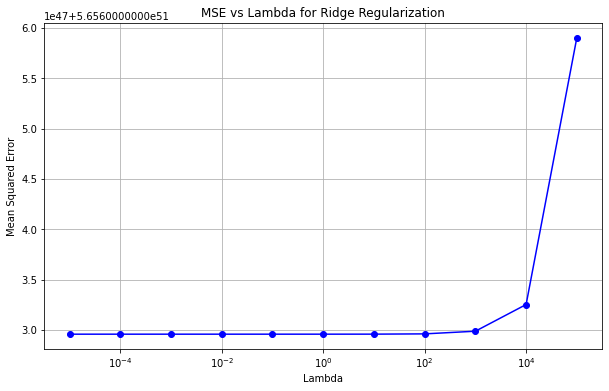

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Given data points
data_points = [(19, -54560309843696), (18, -30339354513834.77), (-10, -91184782477.52),
               (10, -85898775174.14), (-13, -1237291760048.1), (-8, -10492513303.91),
               (15, -4975161038149.7), (14, -2532208829037.05), (5, -73022858.75),
               (7, -2394677392.55), (-14, -2730798374049.48), (-16, -10063095866406.88),
               (0, 5.06), (-17, -19092799986199), (-5, -93687354.53), (16, -9784492430732.26),
               (17, -17563667410859.64), (6, -493163537.78), (11, -214042228397.21),
               (-9, -33109540701.72), (13, -1178660534007.04), (-2, -11824.5)
              ]

# Extract x and y values from data points
x_values = np.array([x for x, _ in data_points])
y_values = np.array([y for _, y in data_points])

# Degree of the polynomial
degree = 10

# Create the Vandermonde matrix for polynomial regression
X = np.vander(x_values, degree + 1, increasing=True)

# Plot data points 
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Data Points')
plt.grid()
plt.legend()
plt.show()

# Calculate OLS parameters using matrix pseudo-inverse
ols_parameters = np.linalg.pinv(X) @ y_values

# Print the OLS estimate
print("OLS Estimate:")
print("Coefficients:", [f'{coef:.2e}' for coef in ols_parameters])

# Plot OLS approximation
x_range = np.linspace(min(x_values), max(x_values), 1000)
ols_approximation = np.polyval(ols_parameters[::-1], x_range)
plt.figure(figsize=(10, 6))
plt.plot(x_range, ols_approximation, color='green', label='OLS Approximation')
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('OLS Approximation')
plt.grid()
plt.legend()
plt.show()

# Calculate the OLS ridge-regularized estimates for different lambdas
lambdas_ridge = np.logspace(5, -5, 11)
mse_values = []
for lambda_ridge in lambdas_ridge:
    
    # Calculate Ridge-regularized parameters using matrix pseudo-inverse
    ridge_parameters = np.linalg.inv(X.T @ X + lambda_ridge * np.identity(degree + 1)) @ X.T @ y_values
    print(f'Ridge Estimate for lambda {lambda_ridge:.2e}:')
    print("Coefficients:", [f'{coef:.2e}' for coef in ridge_parameters])
    
    # Plot Ridge approximation
    ridge_approximation = np.polyval(ridge_parameters[::-1], x_range)
    plt.figure(figsize=(10, 6))
    plt.plot(x_range, ridge_approximation, color='red', label=f'Ridge Approximation for lambda {lambda_ridge:.2e}')
    plt.plot(x_range, ols_approximation, color='green', label='OLS Approximation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Ridge Approximation for lambda {lambda_ridge:.2e}')
    plt.grid()
    plt.legend()
    plt.show()
    
    # Calculate MSE
    y_pred = np.polyval(ridge_parameters[::-1], x_values)
    mse = mean_squared_error(y_values, y_pred)
    print(f'MSE for lambda {lambda_ridge:.2e}: {mse:.2e}')
    print('*' * 125)
    mse_values.append(mse)

# Plot MSE values for different lambdas
plt.figure(figsize=(10, 6))
plt.plot(lambdas_ridge, mse_values, marker='o', color='blue')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda for Ridge Regularization')
plt.grid()
plt.show()
